# Data Pre Processing #

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [17]:
df1 = pd.read_csv("Combined/PR_audacity_combined.csv")
df2 = pd.read_csv("Combined/PR_jabref_combined.csv")
df3 = pd.read_csv("Combined/PR_powertoys_combined.csv")
df4 = pd.read_csv("Combined/PR_ant-design_combined.csv")
df5 = pd.read_csv("Combined/PR_bticoin_combined.csv")
df6 = pd.read_csv("Combined/PR_flutter_combined.csv")
df7 = pd.read_csv("Combined/PR_freeCodeCamp_combined.csv")
df8 = pd.read_csv("Combined/PR_langchain_combined.csv")
df9 = pd.read_csv("Combined/PR_mrdoob_combined.csv")
df10 = pd.read_csv("Combined/PR_node_combined.csv")
df11 = pd.read_csv("Combined/PR_playwright_combined.csv")
df12 = pd.read_csv("Combined/PR_pytorch_combined.csv")
df13 = pd.read_csv("Combined/PR_rust_combined.csv")
df14 = pd.read_csv("Combined/PR_swift_combined.csv")
df15 = pd.read_csv("Combined/PR_transformers_combined.csv")


df1['repo'] = '1'
df2['repo'] = '2'
df3['repo'] = '3'
df4['repo'] = '4'
df5['repo'] = '5'
df6['repo'] = '6'
df7['repo'] = '7'
df8['repo'] = '8'
df9['repo'] = '9'
df10['repo'] = '10'
df11['repo'] = '11'
df12['repo'] = '12'
df13['repo'] = '13'
df14['repo'] = '14'
df15['repo'] = '15'

#combine all the data
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15])

#ensure repo is a string
df['repo'] = df['repo'].astype(str)

In [18]:
#print out column names
print(df.columns)

Index(['pr_number', 'created_at', 'merged_at', 'author', 'number_of_comments',
       'number_of_review_comments', 'number_of_commits',
       'lines_of_code_changed', 'number_of_files_changed',
       'number_of_reviewers', 'number_of_approvals', 'labels',
       'time_to_first_response', 'number_of_assignees', 'review_duration',
       'number_of_changes_requested', 'number_of_build_runs',
       'number_of_build_failures', 'number_of_linked_issues',
       'time_since_last_commit', 'test_coverage',
       'number_of_reviews_requested', 'number_of_revisions',
       'number_of_milestones', 'dependency_changes', 'comment_authors',
       'issue_comments_text', 'reviews_text', 'issue_text', 'review_comments',
       'repo'],
      dtype='object')


In [19]:
df = df[[
    # Excellent Candidates (Available at or very soon after creation)
    'pr_number',
    'created_at',
    'merged_at',
    'author',
    'lines_of_code_changed',
    'number_of_files_changed',
    'labels',
    'number_of_assignees',
    'number_of_linked_issues',
    'issue_text',
    'number_of_reviews_requested',
    'number_of_milestones',
    'dependency_changes',

    # Potentially Useful (Might require some early processing or slight delay)
    'number_of_commits',
    'test_coverage',
    'comment_authors',
    'issue_comments_text',
    'repo'
]]

# Chcek date to ensure that it is unseen to LLM

In [20]:
#only use rows that have a created at date after 2024-07-18
df['created_at_check'] = pd.to_datetime(df['created_at'])
df = df[df['created_at_check'] > '2024-07-18']
df = df.drop(columns=['created_at_check'])


In [21]:
df.head()

,pr_number,created_at,merged_at,author,lines_of_code_changed,number_of_files_changed,labels,number_of_assignees,number_of_linked_issues,issue_text,number_of_reviews_requested,number_of_milestones,dependency_changes,number_of_commits,test_coverage,comment_authors,issue_comments_text,repo
0,7308,2024-09-10T13:07:38Z,2024-09-10T13:49:46Z,igorkorsukov,9,2,[],0,0,NaN,0,0,False,1,NaN,[],NaN,1
1,7303,2024-09-10T12:15:27Z,2024-09-10T12:42:48Z,igorkorsukov,9,1,[],0,0,NaN,0,0,False,1,NaN,[],NaN,1
2,7301,2024-09-10T10:27:20Z,2024-09-10T13:13:54Z,grliszas14,40,1,[],0,0,Resolves: https://github.com/audacity/audacity...,0,0,False,2,NaN,[],NaN,1
3,7288,2024-09-09T13:13:46Z,2024-09-09T14:53:04Z,LWinterberg,12,3,[],0,0,NaN,0,0,False,1,NaN,[],NaN,1
4,7295,2024-09-10T08:53:37Z,2024-09-10T09:58:23Z,grliszas14,2,1,[],0,0,NaN,0,0,False,1,NaN,[],NaN,1


In [22]:
df.shape

(8169, 18)

In [23]:
#save to csv
#df.to_csv("Combined/PR_combined.csv.csv", index=False)

# Cleaning the data

## Feature Extraction/ Generation


In [24]:

#count words in issue text only if df[comments] ==1 else put 0
df['issue_text_wordiness'] = df['issue_text'].apply(lambda x: 0 if pd.isnull(x) else len(x.split())) 

In [25]:
#create a copy of Data fram for LLM
df_llm = df.copy()


## Clean Labels

In [26]:
import pandas as pd

# List all the unique labels and account for each
labels_all = df['labels'].unique()

# Convert to DataFrame
labels_all = pd.DataFrame(labels_all, columns=['label'])

# Convert everything to lowercase
labels_all['label'] = labels_all['label'].str.lower()

# Remove unwanted characters
labels_all['label'] = labels_all['label'].str.replace(r'[\[\]"\']', '', regex=True)

# Drop empty labels after cleaning
labels_all = labels_all[labels_all['label'].str.strip() != '']

#remove right square brackets quotes
#labels_all = labels_all.apply(lambda x: x.str.replace('\,',','))

#Split labels that contain commas into separate entries
label_list = labels_all['label'].str.split(',\s*', expand=True).stack().reset_index(drop=True)

# Get unique values
unique_labels = label_list.unique().tolist()



In [27]:
labels_df = pd.DataFrame(columns=unique_labels)
labels_df['Original_labels'] = df['labels'] 
for label in unique_labels:
    labels_df[label] = labels_df['Original_labels'].apply(lambda x: 1 if label in x else 0)

#add a row that sums teh count for each column 
labels_df.loc['Total'] = labels_df.sum()

#drop the original labels column
labels_df.drop('Original_labels', axis=1, inplace=True)

#drop all columns with a total less than 10
labels_df = labels_df.loc[:, (labels_df.sum(axis=0) > 10)]

#drop total row
labels_df = labels_df.drop(['Total'])

#count the number of 1s in each row and call teh column label_count
labels_df['label_count'] = labels_df.sum(axis=1)

#add labels_df['label_count'] to df_llm
df_llm['label_count'] = labels_df['label_count']


/var/folders/8z/fy7_m7bd71552lpw8_st6mgr0000gn/T/ipykernel_27135/233184938.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  labels_df['label_count'] = labels_df.sum(axis=1)


In [28]:
#concatenate labels_df to the original dataframe
df = pd.concat([df.reset_index(drop=True), labels_df.reset_index(drop=True)], axis=1)

#drop the labels column
df.drop(['labels'], axis=1, inplace=True)


In [29]:
df.shape

(8169, 172)

In [30]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
df['merged_at'] = pd.to_datetime(df['merged_at'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
df['Issue_Lifetime(hours)'] = (df['merged_at'] - df['created_at']).dt.total_seconds() / 3600


# Define the conditions for the 'Issue Lifetime' groups
conditions = [
    (df['Issue_Lifetime(hours)'] < 1),  # less than 1 hour - group 1
    (df['Issue_Lifetime(hours)'] >= 1) & (df['Issue_Lifetime(hours)'] < 24), # between 1 hour and 1 days - group 2
    (df['Issue_Lifetime(hours)'] >= 24) & (df['Issue_Lifetime(hours)'] < 168),  # between 1 day1 and a week - group 3
    (df['Issue_Lifetime(hours)'] >= 168) & (df['Issue_Lifetime(hours)'] < 5040),  # between  week and a month - group 4
    (df['Issue_Lifetime(hours)'] >= 5040)  # more than a month - group 5
]

# Define the corresponding group numbers
groups = [1, 2, 3, 4, 5]
group_dict={
    1: 'Less than 1 hour',
    2: 'Between 1 hour and 1 day',
    3: 'Between 1 day and a week',
    4: 'Between a week and a month',
    5: 'More than a month'
}

# Create the 'Issue Lifetime' column using np.select
df['Issue Lifetime'] = np.select(conditions, groups)

#add the issue lifetime to the df_llm
df_llm['Issue Lifetime'] = df['Issue Lifetime']


## Clean text

In [31]:
import re

def clean_review_comment(text):
    # If text is not a string (e.g. NaN), return an empty string
    if not isinstance(text, str):
        return ""
    
    # Remove code blocks (anything between triple backticks)
    text = re.sub(r'```[\s\S]*?```', ' ', text)
    # Remove inline code (anything between single backticks)
    text = re.sub(r'`[^`]*`', ' ', text)
    
    # Remove commit hashes (40-character hexadecimal strings)
    text = re.sub(r'\b[0-9a-f]{40}\b', ' ', text)
    
    # Remove URLs
    text = re.sub(r'https?://\S+', ' ', text)
    
    # Remove extra quotes (replace multiple quotes with a single quote)
    text = re.sub(r'"+', '"', text)
    
    # (Optional) Remove boilerplate phrases or common templates
    text = re.sub(r'(?im)^(Checklist:|Note:).*$', ' ', text)
    
    # Remove punctuation (if desired)
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Lowercase the text
    text = text.lower()
    
    # Keep only English words of length 2 or more
    tokens = re.findall(r'\b[A-Za-z]{2,}\b', text)
    
    # Join tokens back into a single cleaned string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


df['issue_text'] = df['issue_text'].apply(clean_review_comment)

#add the issue text to the df_llm
df_llm['issue_text'] = df['issue_text']




# TFIDF

In [32]:
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack, csr_matrix
import nltk

 #nltk.download('punkt')  # ensure the tokenizer models are downloaded
#nltk.download('punkt_tab')

def nltk_tokenizer(text):
    return nltk.word_tokenize(text)


#create new dataframe
df_TFIDF = df[[ 'issue_text', 'repo', 'Issue Lifetime']].copy()

# Combine the issue text and comments text into a single column
df_TFIDF['all_text'] =  df_TFIDF['issue_text'] 

#df_TFIDF['issue_comments_text'] +' '+ df_TFIDF['review_comments']+ ' ' + 

#get the stem words in all_text
stemmer = PorterStemmer()
df_TFIDF['all_text'] = df_TFIDF['all_text'].apply(
    lambda x: ' '.join([stemmer.stem(word) for word in str(x).split()])
) 


# Create a TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=10000, tokenizer=nltk_tokenizer, token_pattern=None, stop_words='english', max_df=0.8,  min_df=0.2 )
tfidf.fit(df_TFIDF['all_text'])
text_tfidf = tfidf.transform(df_TFIDF['all_text'])

#  Convert the TF-IDF sparse matrix into a DataFrame.
#    Use the same index as df to ensure proper merging.
tfidf_df = pd.DataFrame(
    text_tfidf.toarray(), 
    columns=tfidf.get_feature_names_out(), 
    index=df.index
)


# 5. Merge the TF-IDF features back into the original df.
#    If you no longer need the raw text columns, you can drop them later.
df = pd.concat([df, tfidf_df], axis=1)



In [33]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features=1000, tokenizer=nltk_tokenizer, token_pattern=None, stop_words='english', max_df=0.8,  min_df=0.2)
count_vect.fit(df_TFIDF['all_text'])
text_count = count_vect.transform(df_TFIDF['all_text'])

# Convert to DataFrame
count_df = pd.DataFrame(
    text_count.toarray(), 
    columns=count_vect.get_feature_names_out(), 
    index=df.index
)

# Merge back into original dataframe
#df = pd.concat([df.reset_index(drop=True), count_df.reset_index(drop=True)], axis=1)

#save to csv


In [34]:
df.shape

(8169, 197)

## Data Distribution ##

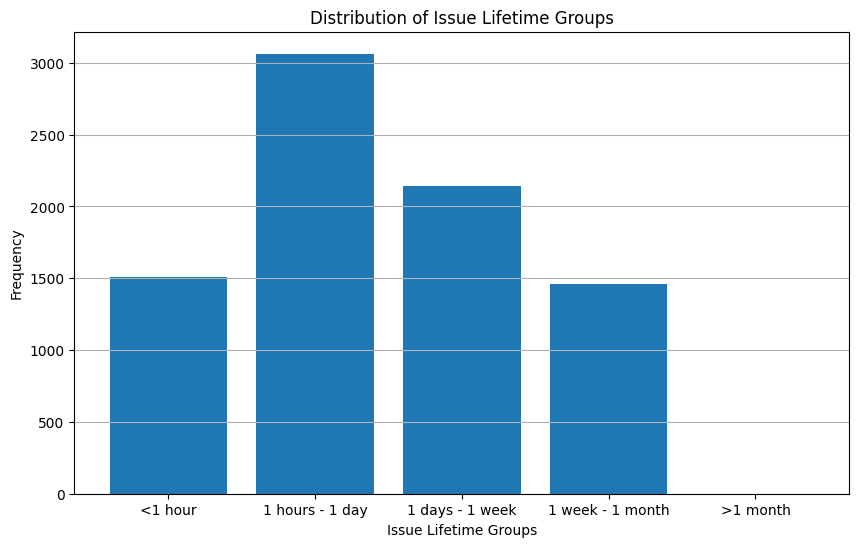

In [35]:
# Graphing the distribution of the groups
group_counts = df['Issue Lifetime'].value_counts().sort_index()

#if the group is empty then add it to the group counts and assign zero
for i in range(1, 6):
    if i not in group_counts.index:
        group_counts.loc[i] = 0

plt.figure(figsize=(10, 6))
plt.bar(group_counts.index, group_counts.values, tick_label=['<1 hour','1 hours - 1 day', '1 days - 1 week', '1 week - 1 month','>1 month'])
plt.title('Distribution of Issue Lifetime Groups')
plt.xlabel('Issue Lifetime Groups')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.show()

# More Feature Extraction


In [36]:
import pandas as pd

# Ensure 'created_at' and 'merged_at' are in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['merged_at'] = pd.to_datetime(df['merged_at'])

# Calculate 'Issues Opened in Last 2 Weeks' for each row depending on its repo
df['Issues Opened in Last 2 Weeks'] = df.apply(
    lambda row: df[(df['created_at'] >= row['created_at'] - pd.Timedelta(days=14)) & 
                   (df['created_at'] < row['created_at']) & 
                   (df['repo'] == row['repo'])].shape[0], axis=1
)
# Calculate 'Issues Closed in Last 2 Weeks' for each row
df['Issues Closed in Last 2 Weeks'] = df.apply(
    lambda row: df[(df['merged_at'] >= row['merged_at'] - pd.Timedelta(days=14)) & 
                   (df['merged_at'] < row['merged_at'])& 
                   (df['repo'] == row['repo'])].shape[0], axis=1
)

# Calculate 'Open PRs at Open Date' for each row
df['Open PRs at Open Date'] = df.apply(
    lambda row: df[(df['created_at'] < row['created_at']) & 
                   (df['merged_at'] > row['created_at'])& 
                   (df['repo'] == row['repo'])].shape[0], axis=1
)


In [37]:
# Reset the index to ensure it's unique
df = df.reset_index(drop=True)

# Calculate the number of PRs opened by the author before each PR's created_at date
df['Author PRs Opened'] = df.apply(
    lambda row: df[(df['author'] == row['author']) & 
                   (df['created_at'] < row['created_at'])& 
                   (df['repo'] == row['repo'])].shape[0], axis=1
)


In [38]:
#determien teh day ofthe week teh PR was created
df['day_of_week'] = df['created_at'].dt.dayofweek
#0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday

#for df['weekday'] set to 1 if day_of_week is between 0 and 4 else 0
df['weekday'] = df['day_of_week'].apply(lambda x: 1 if x >= 0 and x <= 4 else 0)


In [39]:
# add 'day_of_week', 'weekday', 'Author PRs Opened', 'Open PRs at Open Date', 'Issues Closed in Last 2 Weeks', 'Issues Opened in Last 2 Weeks' to df_llm
df_llm['day_of_week'] = df['day_of_week']
df_llm['weekday'] = df['weekday']
df_llm['Author PRs Opened'] = df['Author PRs Opened']
df_llm['Open PRs at Open Date'] = df['Open PRs at Open Date']
df_llm['Issues Closed in Last 2 Weeks'] = df['Issues Closed in Last 2 Weeks']
df_llm['Issues Opened in Last 2 Weeks'] = df['Issues Opened in Last 2 Weeks']


#drop the created_at and merged_at columns and author
df_llm.drop(['created_at', 'merged_at', 'author'], axis=1, inplace=True)




In [40]:
#save to csv
df_llm.to_csv("TtST_llm_tabular_text_issue.csv", index=False)

In [41]:
#drop the created_at and merged_at columns and author
df.drop(['created_at', 'merged_at','author'], axis=1, inplace=True)

In [42]:
# List of columns to drop
columns_to_drop = ['review_comments', 'issue_text', 'issue_comments_text', 'comment_authors', 'reviews_text', 'review_duration']

for column in columns_to_drop:
    try:
        df.drop([column], axis=1, inplace=True)
    except KeyError:
        # Column not found, pass without raising an error
        pass


## Correlation Matrix ##

In [43]:
# Replace empty strings or invalid values with NaN
df.replace('', np.nan, inplace=True)

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix

,pr_number,lines_of_code_changed,number_of_files_changed,number_of_assignees,number_of_linked_issues,number_of_reviews_requested,number_of_milestones,number_of_commits,test_coverage,issue_text_wordiness,...,request,test,thi,use,Issues Opened in Last 2 Weeks,Issues Closed in Last 2 Weeks,Open PRs at Open Date,Author PRs Opened,day_of_week,weekday
pr_number,1.000000,0.005442,0.040116,0.201677,NaN,0.064881,0.220059,-0.003935,NaN,0.005476,...,-0.111908,0.113525,0.180657,0.187258,0.441712,0.473692,0.256771,-0.021380,0.023201,-0.024157
lines_of_code_changed,0.005442,1.000000,0.400365,-0.010563,NaN,-0.004346,-0.015918,0.106632,NaN,0.058082,...,0.036496,0.006001,-0.004380,-0.004836,-0.024836,-0.021065,-0.028000,-0.012755,-0.004165,-0.000297
number_of_files_changed,0.040116,0.400365,1.000000,0.004899,NaN,0.046442,0.015223,0.274529,NaN,0.192036,...,-0.000059,0.046639,0.007320,0.007307,0.015438,0.021441,0.015885,-0.018542,0.003831,0.006138
number_of_assignees,0.201677,-0.010563,0.004899,1.000000,NaN,-0.063841,0.265032,0.016777,NaN,-0.031038,...,-0.036129,-0.021148,0.018186,0.031244,0.138072,0.211947,0.115113,-0.110836,0.026472,-0.036721
number_of_linked_issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Issues Closed in Last 2 Weeks,0.473692,-0.021065,0.021441,0.211947,NaN,0.106888,0.200143,0.005360,NaN,-0.103495,...,-0.126521,0.046537,0.074775,0.086498,0.833999,1.000000,0.290218,0.012685,0.043628,-0.034056
Open PRs at Open Date,0.256771,-0.028000,0.015885,0.115113,NaN,0.044659,0.005018,0.062218,NaN,0.012798,...,-0.092858,0.064726,0.178744,0.055647,0.372306,0.290218,1.000000,-0.268184,0.001154,0.002161
Author PRs Opened,-0.021380,-0.012755,-0.018542,-0.110836,NaN,-0.105592,-0.023007,-0.070152,NaN,-0.156926,...,-0.116628,-0.127188,-0.077295,0.010655,0.062916,0.012685,-0.268184,1.000000,-0.025089,0.031089
day_of_week,0.023201,-0.004165,0.003831,0.026472,NaN,-0.004519,0.046601,0.008749,NaN,0.007708,...,0.003208,-0.000672,0.003634,-0.004218,0.030618,0.043628,0.001154,-0.025089,1.000000,-0.680369


# Random Forest

In [44]:
# Replace empty strings or invalid values with NaN
df.replace('', np.nan, inplace=True)

# Prepare features and target variable
target = df['Issue Lifetime']  # This will be treated as a classification target
features = df.drop(['Issue Lifetime', 'Issue_Lifetime(hours)','pr_number'], axis=1, errors='ignore')

# Convert categorical features to dummy variables
features = pd.get_dummies(features, drop_first=True)

# Check and replace inf and NaN values
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features.fillna(0, inplace=True)  # Replace NaN with 0 (or use mean/median if preferred)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#combine train and test sets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

#save the dataframe to a csv file
df_train.to_csv('TtST_data_train.csv', index=False)
df_test.to_csv('TtST_data_test.csv', index=False)

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [45]:
y_rf = []
y_pred = []

# Predict on the test set
for i in range(len(y_test)):
    # Use .iloc[i] to get the ith row as a Series
    X_row = X_test.iloc[i].values.reshape(1, -1)  # Convert row to a 2D array
    
    # Predict the value for this row
    y_pred_single = rf_classifier.predict(X_row)[0]  # Get the single prediction (not an array)
    
    # Append the prediction to the y_pred list
    y_pred.append(y_pred_single)
    
    # If the model predicts correctly, append 1 to y_rf, else append 0
    if y_pred_single == y_test.iloc[i]:
        y_rf.append(1)
    else:
        y_rf.append(0)
        


/Users/atu/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/.local/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/atu/.local/lib/python3.11/site-pa

In [46]:
#print out current time
import datetime
now = datetime.datetime.now()
print ("Current date and time : " + now.strftime("%Y-%m-%d %H:%M:%S"))


Current date and time : 2025-06-17 21:28:45


In [47]:
from sklearn.metrics import f1_score, precision_score, recall_score



print("Precision Score:", precision_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))



Precision Score: 0.6068083909454219
Recall Score: 0.5973072215422277
F1 Score: 0.5907846096907786


In [48]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.Series(rf_classifier.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

#print out feature importancee to importance.txt 



Accuracy Score: 0.5973072215422277
Confusion Matrix:
 [[150 153   6   2]
 [ 65 467  67  14]
 [  7 187 189  50]
 [  3  27  77 170]]
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.48      0.56       311
           2       0.56      0.76      0.65       613
           3       0.56      0.44      0.49       433
           4       0.72      0.61      0.66       277

    accuracy                           0.60      1634
   macro avg       0.63      0.57      0.59      1634
weighted avg       0.61      0.60      0.59      1634

Feature Importances:
 Issues Opened in Last 2 Weeks    0.075078
Author PRs Opened                0.073287
Open PRs at Open Date            0.067209
lines_of_code_changed            0.062582
Issues Closed in Last 2 Weeks    0.061856
                                   ...   
topic: not user facing           0.000029
needs-benchmark-ci               0.000017
test_coverage                    0.000000
dependency

In [49]:
#print out the column names int eh termianl
print("Feature Names:")
for col in features.columns:
    print(col)
# Save feature importances to a text file

Feature Names:
lines_of_code_changed
number_of_files_changed
number_of_assignees
number_of_linked_issues
number_of_reviews_requested
number_of_milestones
dependency_changes
number_of_commits
test_coverage
issue_text_wordiness
bug
ui
dependencies
submodules
type: code-quality
tests
openoffice/libreoffice
status: ready-for-review
jabcon
type: documentation
internationalization
ai
skip-verify-files
javascript
backport
docs
windows
platform-ios
tool
engine
a: desktop
framework
f: material design
f: cupertino
a: tests
f: integration_test
a: text input
d: docs/
f: scrolling
a: accessibility
d: api docs
d: examples
f: routes
autosubmit
will affect goldens
c: tech-debt
c: flake
platform-android
cp: beta
cp: review
team
refactor
status: waiting review
scope: curriculum
scope: i18n
full stack cert
platform: learn
crowdin-sync
new english course
scope: tools/scripts
new javascript course
status: waiting update
platform: api
new python course
status: merge conflict
lgtm
🤖:bug
community
🤖:docs
🤖:ni

In [50]:
#only use columns that have a feature importance above 0.02 and then rerun the model
important_features = feature_importances[feature_importances > 0.01].index.tolist()
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Train the Random Forest Classifier
rf_classifier_important = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_important.fit(X_train_important, y_train)

# Predict on the test set
y_pred_important = rf_classifier_important.predict(X_test_important)

# Evaluate the model
print("Accuracy Score (Important Features):", accuracy_score(y_test, y_pred_important))
print("Precision Score (Important Features):", precision_score(y_test, y_pred_important, average='weighted'))
print("Recall Score (Important Features):", recall_score(y_test, y_pred_important, average='weighted'))
print("F1 Score (Important Features):", f1_score(y_test, y_pred_important, average='weighted'))
print("Confusion Matrix (Important Features):\n", confusion_matrix(y_test, y_pred_important))
print("Classification Report (Important Features):\n", classification_report(y_test, y_pred_important))

#print out important features to important_features.txt
with open('important_features.txt', 'w') as f:
    for feature in important_features:
        f.write(f"{feature}\n")


Accuracy Score (Important Features): 0.6009791921664627
Precision Score (Important Features): 0.6101689991237106
Recall Score (Important Features): 0.6009791921664627
F1 Score (Important Features): 0.5947036690441555
Confusion Matrix (Important Features):
 [[153 146  12   0]
 [ 61 469  72  11]
 [ 11 187 187  48]
 [  3  28  73 173]]
Classification Report (Important Features):
               precision    recall  f1-score   support

           1       0.67      0.49      0.57       311
           2       0.57      0.77      0.65       613
           3       0.54      0.43      0.48       433
           4       0.75      0.62      0.68       277

    accuracy                           0.60      1634
   macro avg       0.63      0.58      0.59      1634
weighted avg       0.61      0.60      0.59      1634



In [51]:
# Feature importance
feature_importances = pd.Series(rf_classifier.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 Issues Opened in Last 2 Weeks    0.075078
Author PRs Opened                0.073287
Open PRs at Open Date            0.067209
lines_of_code_changed            0.062582
Issues Closed in Last 2 Weeks    0.061856
                                   ...   
topic: not user facing           0.000029
needs-benchmark-ci               0.000017
test_coverage                    0.000000
dependency_changes               0.000000
number_of_linked_issues          0.000000
Length: 207, dtype: float64
